### Salary Discrimination

The file salary.txt contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

Sex. 1 for female, 0 for male.

Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.

Year. Number of years in current rank.

Degree. Highest degree. 1 for doctorate, 0 for master's.

YSdeg. Years since highest degree was earned.

Salary. Salary/year in dollars.



**Tasks**

Find the linear regression equation for this data using columns 1-5 to column 6.

Find the selection of columns with the best  R2  score.

Report whether sex is a factor in salary.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_fwf("salary.txt", header=None, names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [3]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [4]:
df.shape

(52, 6)

In [5]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [6]:
df['Sex'].value_counts()

0    38
1    14
Name: Sex, dtype: int64

Dataset has record of 38 men and 14 women 


<AxesSubplot:xlabel='Sex', ylabel='Salary'>

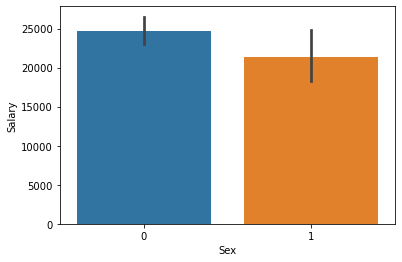

In [7]:
sns.barplot(x='Sex',y='Salary',data=df)

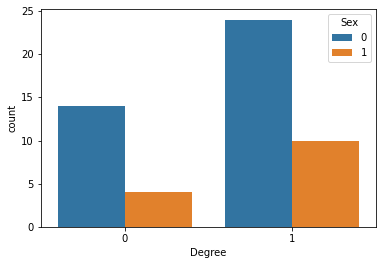

In [8]:
sns.countplot(df.Degree,hue=df.Sex)
plt.show()

Majority of males have Doctorate 

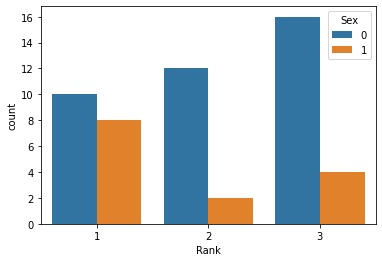

In [9]:
sns.countplot(df.Rank,hue=df.Sex)
plt.show()

Majority of Men are associate professor and full professor when compared to womens

In [10]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [11]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [12]:
corr=df.corr()

In [13]:
corr[['Salary']]

,Salary
Sex,-0.252782
Rank,0.867488
Year,0.700669
Degree,-0.069726
YSdeg,0.674854
Salary,1.000000


For Feature Rank,Year and YSdeg 

1) High correlation between the data 

2) No transformation required

For Feature Sex

1) There is a low linear relationshp between the data 

2) No transformation reqd 

In [14]:
df[['Salary','Degree']].corr()

,Salary,Degree
Salary,1.000000,-0.069726
Degree,-0.069726,1.000000


In [15]:
df['Degree']=np.sqrt(df['Degree'])

In [16]:
df[['Salary','Degree']].corr()

,Salary,Degree
Salary,1.000000,-0.069726
Degree,-0.069726,1.000000


In [17]:
df=df.drop(['Degree'],axis=1)

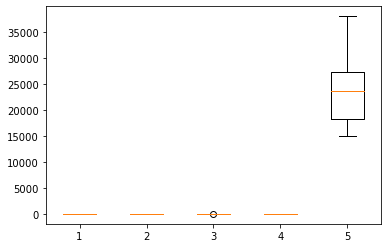

In [18]:
plt.boxplot(df)
plt.show()

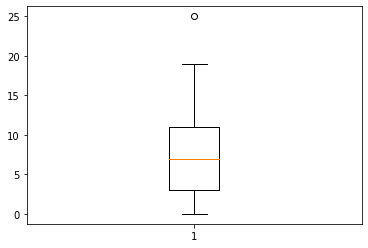

In [19]:
plt.boxplot(df['Year'])
plt.show()

In [20]:
df['Year'].median()

7.0

In [21]:
q25=df['Year'].quantile(0.25)
q75=df['Year'].quantile(0.75)
print(q25,q75)

3.0 11.0


In [22]:
iqr=q75-q25
iqr


8.0

In [23]:
max=q75+(1.5*iqr)
max

23.0

In [24]:
min=q25-(1.5*iqr)
min

-9.0

In [25]:
df=df[(df['Year'] > min) & (df['Year']< max)]

In [26]:
df['Year'].max()

19

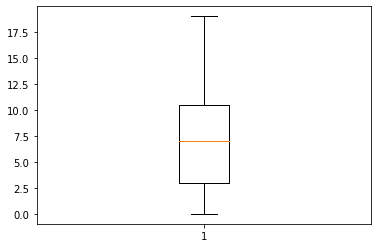

In [27]:
plt.boxplot(df['Year'])
plt.show()

### Data Preparation

In [28]:
X=df.drop(['Salary'],axis=1)
y=df['Salary']

### Split Data

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [30]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(35, 4) (16, 4) (35,) (16,)


### Model Training

In [31]:
model=LinearRegression()

In [32]:
model.fit(X_train,y_train)

LinearRegression()

In [33]:
y_pred=model.predict(X_test)

In [34]:
model.intercept_

11376.397493208084

In [35]:
model.coef_

array([-342.37627689, 4733.03057959,  385.54867968,  -27.53708292])

In [36]:
coeff_df = pd.DataFrame(model.coef_,['Sex','Rank','Year','YSdeg'], columns=['Coefficient'])

coeff_df

,Coefficient
Sex,-342.376277
Rank,4733.030580
Year,385.548680
YSdeg,-27.537083


According to our model, the Rank feature has biggest impact on target prediction

### Evaluation Metrics

In [37]:
r2_score(y_test,y_pred)

0.7273659830537843

**Find the selection of columns with the best R2 score.**

In [68]:
X=df[['Rank']]
y=df[['Salary']]

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [70]:
lr=LinearRegression()

In [71]:
lr.fit(X_train,y_train)

LinearRegression()

In [72]:
y_pred_lr=lr.predict(X_test)

In [73]:
r2_score(y_test,y_pred_lr)

0.7002861923463103

Report whether sex is a factor in salary.

Yes, but not as much as Rank